<a href="https://colab.research.google.com/github/Alanoudhud/DataMining-Project/blob/main/Reports/Phase3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Phase 3 Part 1: Classification 🧑‍💻


 **Description**
In this part, we import the necessary libraries and load the dataset. We use a *Decision Tree classifier* for classification and will later evaluate its performance using Entropy and Gini index as criteria.

In [2]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import tree

In [ ]:
df = pd.read_csv('lung_cancer_preprocessed.csv')
X = df.drop(['lung_cancer'], axis=1)
y = df['lung_cancer']
print(df.head())

   patient_id  age  gender  pack_years  radon_exposure  asbestos_exposure  \
0      100000    2       1    0.660248               2                  0   
1      100001    0       0    0.127785               2                  0   
2      100002    2       0    0.004055               1                  1   
3      100003    2       0    0.440640               0                  0   
4      100004    0       0    0.444313               1                  1   

   secondhand_smoke_exposure  copd_diagnosis  alcohol_consumption  \
0                          0               1                    1   
1                          1               1                    1   
2                          1               1                    0   
3                          1               0                    1   
4                          0               1                    0   

   family_history lung_cancer  
0               0          No  
1               1         Yes  
2               0         


####**Removing** **patient_id** and **lung_cancer** columns from features, and storing lung_cancer as target


In [ ]:
# التحضير للميزات (حذف عمود patient_id لأنه معرف)
X = df.drop(['lung_cancer', 'patient_id'], axis=1)
y = df['lung_cancer']  # Target

### 📊 **Splitting** the data into **70/30, 80/20,** and **90/10** for training and testing

In [ ]:
#    70% تدريب  30% اختبار
X_train_70, X_test_30, y_train_70, y_test_30 = train_test_split(X, y, test_size=0.3, random_state=42)

#    80% تدريب  20% اختبار
X_train_80, X_test_20, y_train_80, y_test_20 = train_test_split(X, y, test_size=0.2, random_state=42)

#    90% تدريب  10% اختبار
X_train_90, X_test_10, y_train_90, y_test_10 = train_test_split(X, y, test_size=0.1, random_state=42)

### 🧠 **Training** Decision Trees with **Gini** criterion on different splits

In [ ]:
# معايير Gini
clf_gini_70 = DecisionTreeClassifier(criterion='gini', random_state=42)
clf_gini_70.fit(X_train_70, y_train_70)

clf_gini_80 = DecisionTreeClassifier(criterion='gini', random_state=42)
clf_gini_80.fit(X_train_80, y_train_80)

clf_gini_90 = DecisionTreeClassifier(criterion='gini', random_state=42)
clf_gini_90.fit(X_train_90, y_train_90)


DecisionTreeClassifier(random_state=42)

### 🧠 **Training** Decision Trees with **Entropy** criterion on different splits

In [ ]:
# معايير Entropy
clf_entropy_70 = DecisionTreeClassifier(criterion='entropy', random_state=42)
clf_entropy_70.fit(X_train_70, y_train_70)

clf_entropy_80 = DecisionTreeClassifier(criterion='entropy', random_state=42)
clf_entropy_80.fit(X_train_80, y_train_80)

clf_entropy_90 = DecisionTreeClassifier(criterion='entropy', random_state=42)
clf_entropy_90.fit(X_train_90, y_train_90)

DecisionTreeClassifier(criterion='entropy', random_state=42)

### **generate** predictions using both **Gini** and **Entropy** models for all split ratios.

In [ ]:
# التنبؤ باستخدام معيار Gini
y_pred_70_gini = clf_gini_70.predict(X_test_30)
y_pred_80_gini = clf_gini_80.predict(X_test_20)
y_pred_90_gini = clf_gini_90.predict(X_test_10)

# التنبؤ باستخدام معيار Entropy
y_pred_70_entropy = clf_entropy_70.predict(X_test_30)
y_pred_80_entropy = clf_entropy_80.predict(X_test_20)
y_pred_90_entropy = clf_entropy_90.predict(X_test_10)

### **calculate** the accuracy scores for all **Gini** and **Entropy** models across the different splits.

In [ ]:

# حساب دقة النموذج باستخدام معيار Gini
accuracy_70_gini = accuracy_score(y_test_30, y_pred_70_gini)
accuracy_80_gini = accuracy_score(y_test_20, y_pred_80_gini)
accuracy_90_gini = accuracy_score(y_test_10, y_pred_90_gini)

# حساب دقة النموذج باستخدام معيار Entropy
accuracy_70_entropy = accuracy_score(y_test_30, y_pred_70_entropy)
accuracy_80_entropy = accuracy_score(y_test_20, y_pred_80_entropy)
accuracy_90_entropy = accuracy_score(y_test_10, y_pred_90_entropy)

# طباعة الدقة لكل تقسيم
print("*Accuracy for Gini*")
print(f"70/30 Split: {accuracy_70_gini}")
print(f"80/20 Split: {accuracy_80_gini}")
print(f"90/10 Split: {accuracy_90_gini}")

print("\n*Accuracy for Entropy*")
print(f"70/30 Split: {accuracy_70_entropy}")
print(f"80/20 Split: {accuracy_80_entropy}")
print(f"90/10 Split: {accuracy_90_entropy}")

*Accuracy for Gini*
70/30 Split: 0.7294666666666667
80/20 Split: 0.6488
90/10 Split: 0.6378

*Accuracy for Entropy*
70/30 Split: 0.6517333333333334
80/20 Split: 0.6487
90/10 Split: 0.6346


### **compute** and **visualize** the **confusion** **matrices** for each model to evaluate prediction performance.

*Confusion Matrix for Gini*
70/30 Split:
[[1333 3329]
 [ 729 9609]]
80/20 Split:
[[1364 1754]
 [1758 5124]]
90/10 Split:
[[ 687  881]
 [ 930 2502]]

*Confusion Matrix for Entropy*
70/30 Split:
[[2031 2631]
 [2593 7745]]
80/20 Split:
[[1344 1774]
 [1739 5143]]
90/10 Split:
[[ 658  910]
 [ 917 2515]]


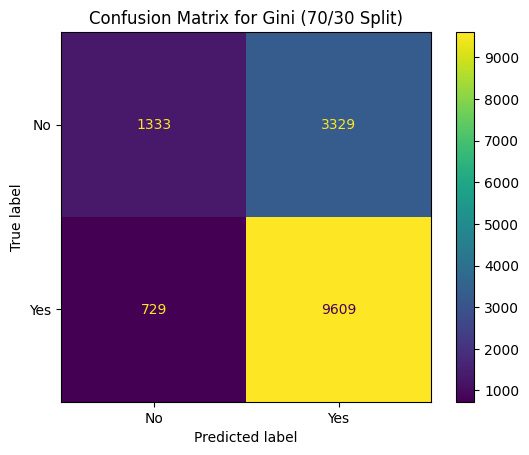

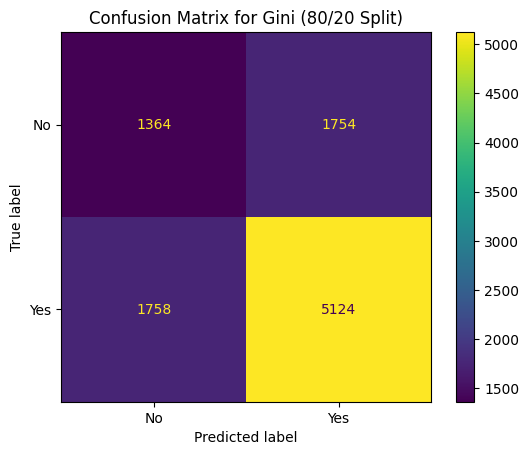

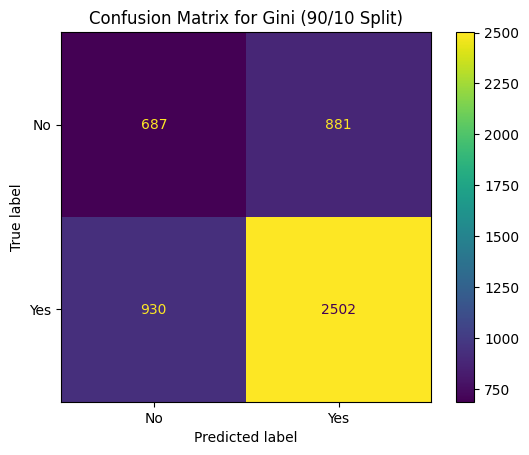

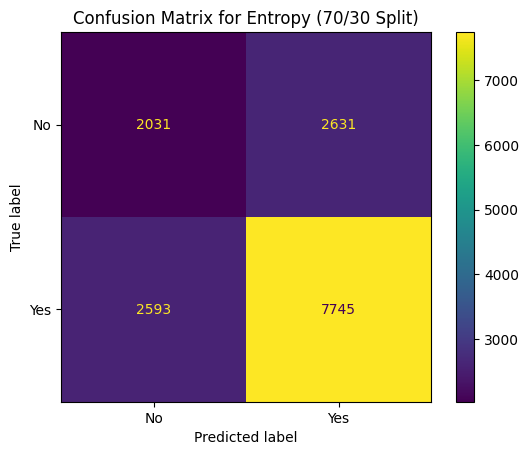

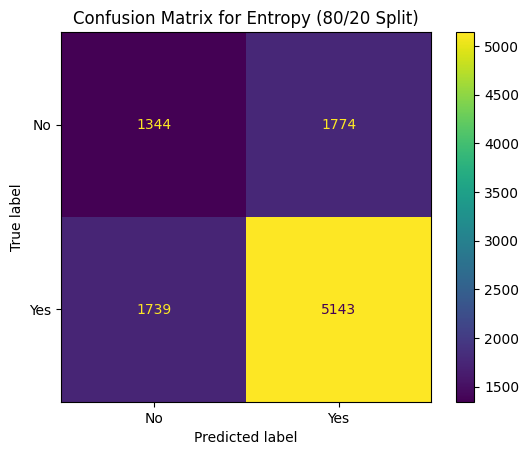

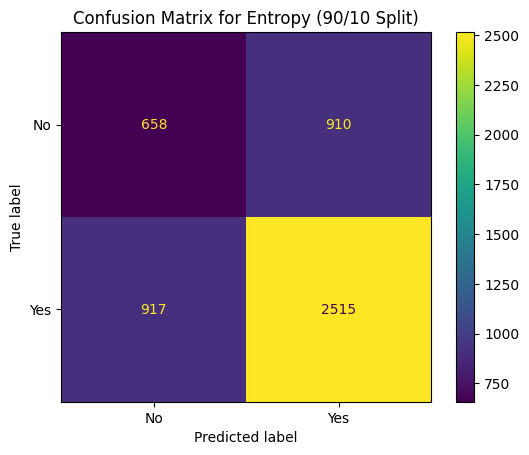

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# حساب مصفوفة الالتباس باستخدام Gini
cm_70_gini = confusion_matrix(y_test_30, y_pred_70_gini)
cm_80_gini = confusion_matrix(y_test_20, y_pred_80_gini)
cm_90_gini = confusion_matrix(y_test_10, y_pred_90_gini)

# حساب مصفوفة الالتباس باستخدام Entropy
cm_70_entropy = confusion_matrix(y_test_30, y_pred_70_entropy)
cm_80_entropy = confusion_matrix(y_test_20, y_pred_80_entropy)
cm_90_entropy = confusion_matrix(y_test_10, y_pred_90_entropy)

# طباعة مصفوفة الالتباس لكل تقسيم
print("*Confusion Matrix for Gini*")
print(f"70/30 Split:\n{cm_70_gini}")
print(f"80/20 Split:\n{cm_80_gini}")
print(f"90/10 Split:\n{cm_90_gini}")

print("\n*Confusion Matrix for Entropy*")
print(f"70/30 Split:\n{cm_70_entropy}")
print(f"80/20 Split:\n{cm_80_entropy}")
print(f"90/10 Split:\n{cm_90_entropy}")

# الحصول على أسماء التصنيفات من البيانات
cn = df['lung_cancer'].unique()

# عرض مصفوفة الالتباس لكل تقسيم باستخدام Gini
disp_70_gini = ConfusionMatrixDisplay(confusion_matrix=cm_70_gini, display_labels=cn)
disp_70_gini.plot(cmap='viridis')  # تم تغيير اللون إلى viridis
plt.title("Confusion Matrix for Gini (70/30 Split)")
plt.show()

disp_80_gini = ConfusionMatrixDisplay(confusion_matrix=cm_80_gini, display_labels=cn)
disp_80_gini.plot(cmap='viridis')  # تم تغيير اللون إلى viridis
plt.title("Confusion Matrix for Gini (80/20 Split)")
plt.show()

disp_90_gini = ConfusionMatrixDisplay(confusion_matrix=cm_90_gini, display_labels=cn)
disp_90_gini.plot(cmap='viridis')  # تم تغيير اللون إلى viridis
plt.title("Confusion Matrix for Gini (90/10 Split)")
plt.show()

# عرض مصفوفة الالتباس لكل تقسيم باستخدام Entropy
disp_70_entropy = ConfusionMatrixDisplay(confusion_matrix=cm_70_entropy, display_labels=cn)
disp_70_entropy.plot(cmap='viridis')  # تم تغيير اللون إلى viridis
plt.title("Confusion Matrix for Entropy (70/30 Split)")
plt.show()

disp_80_entropy = ConfusionMatrixDisplay(confusion_matrix=cm_80_entropy, display_labels=cn)
disp_80_entropy.plot(cmap='viridis')  # تم تغيير اللون إلى viridis
plt.title("Confusion Matrix for Entropy (80/20 Split)")
plt.show()

disp_90_entropy = ConfusionMatrixDisplay(confusion_matrix=cm_90_entropy, display_labels=cn)
disp_90_entropy.plot(cmap='viridis')  # تم تغيير اللون إلى viridis
plt.title("Confusion Matrix for Entropy (90/10 Split)")
plt.show()

### **plot** the **Decision** **Tree** structure for the 70/30 model using the **Gini** criterion.

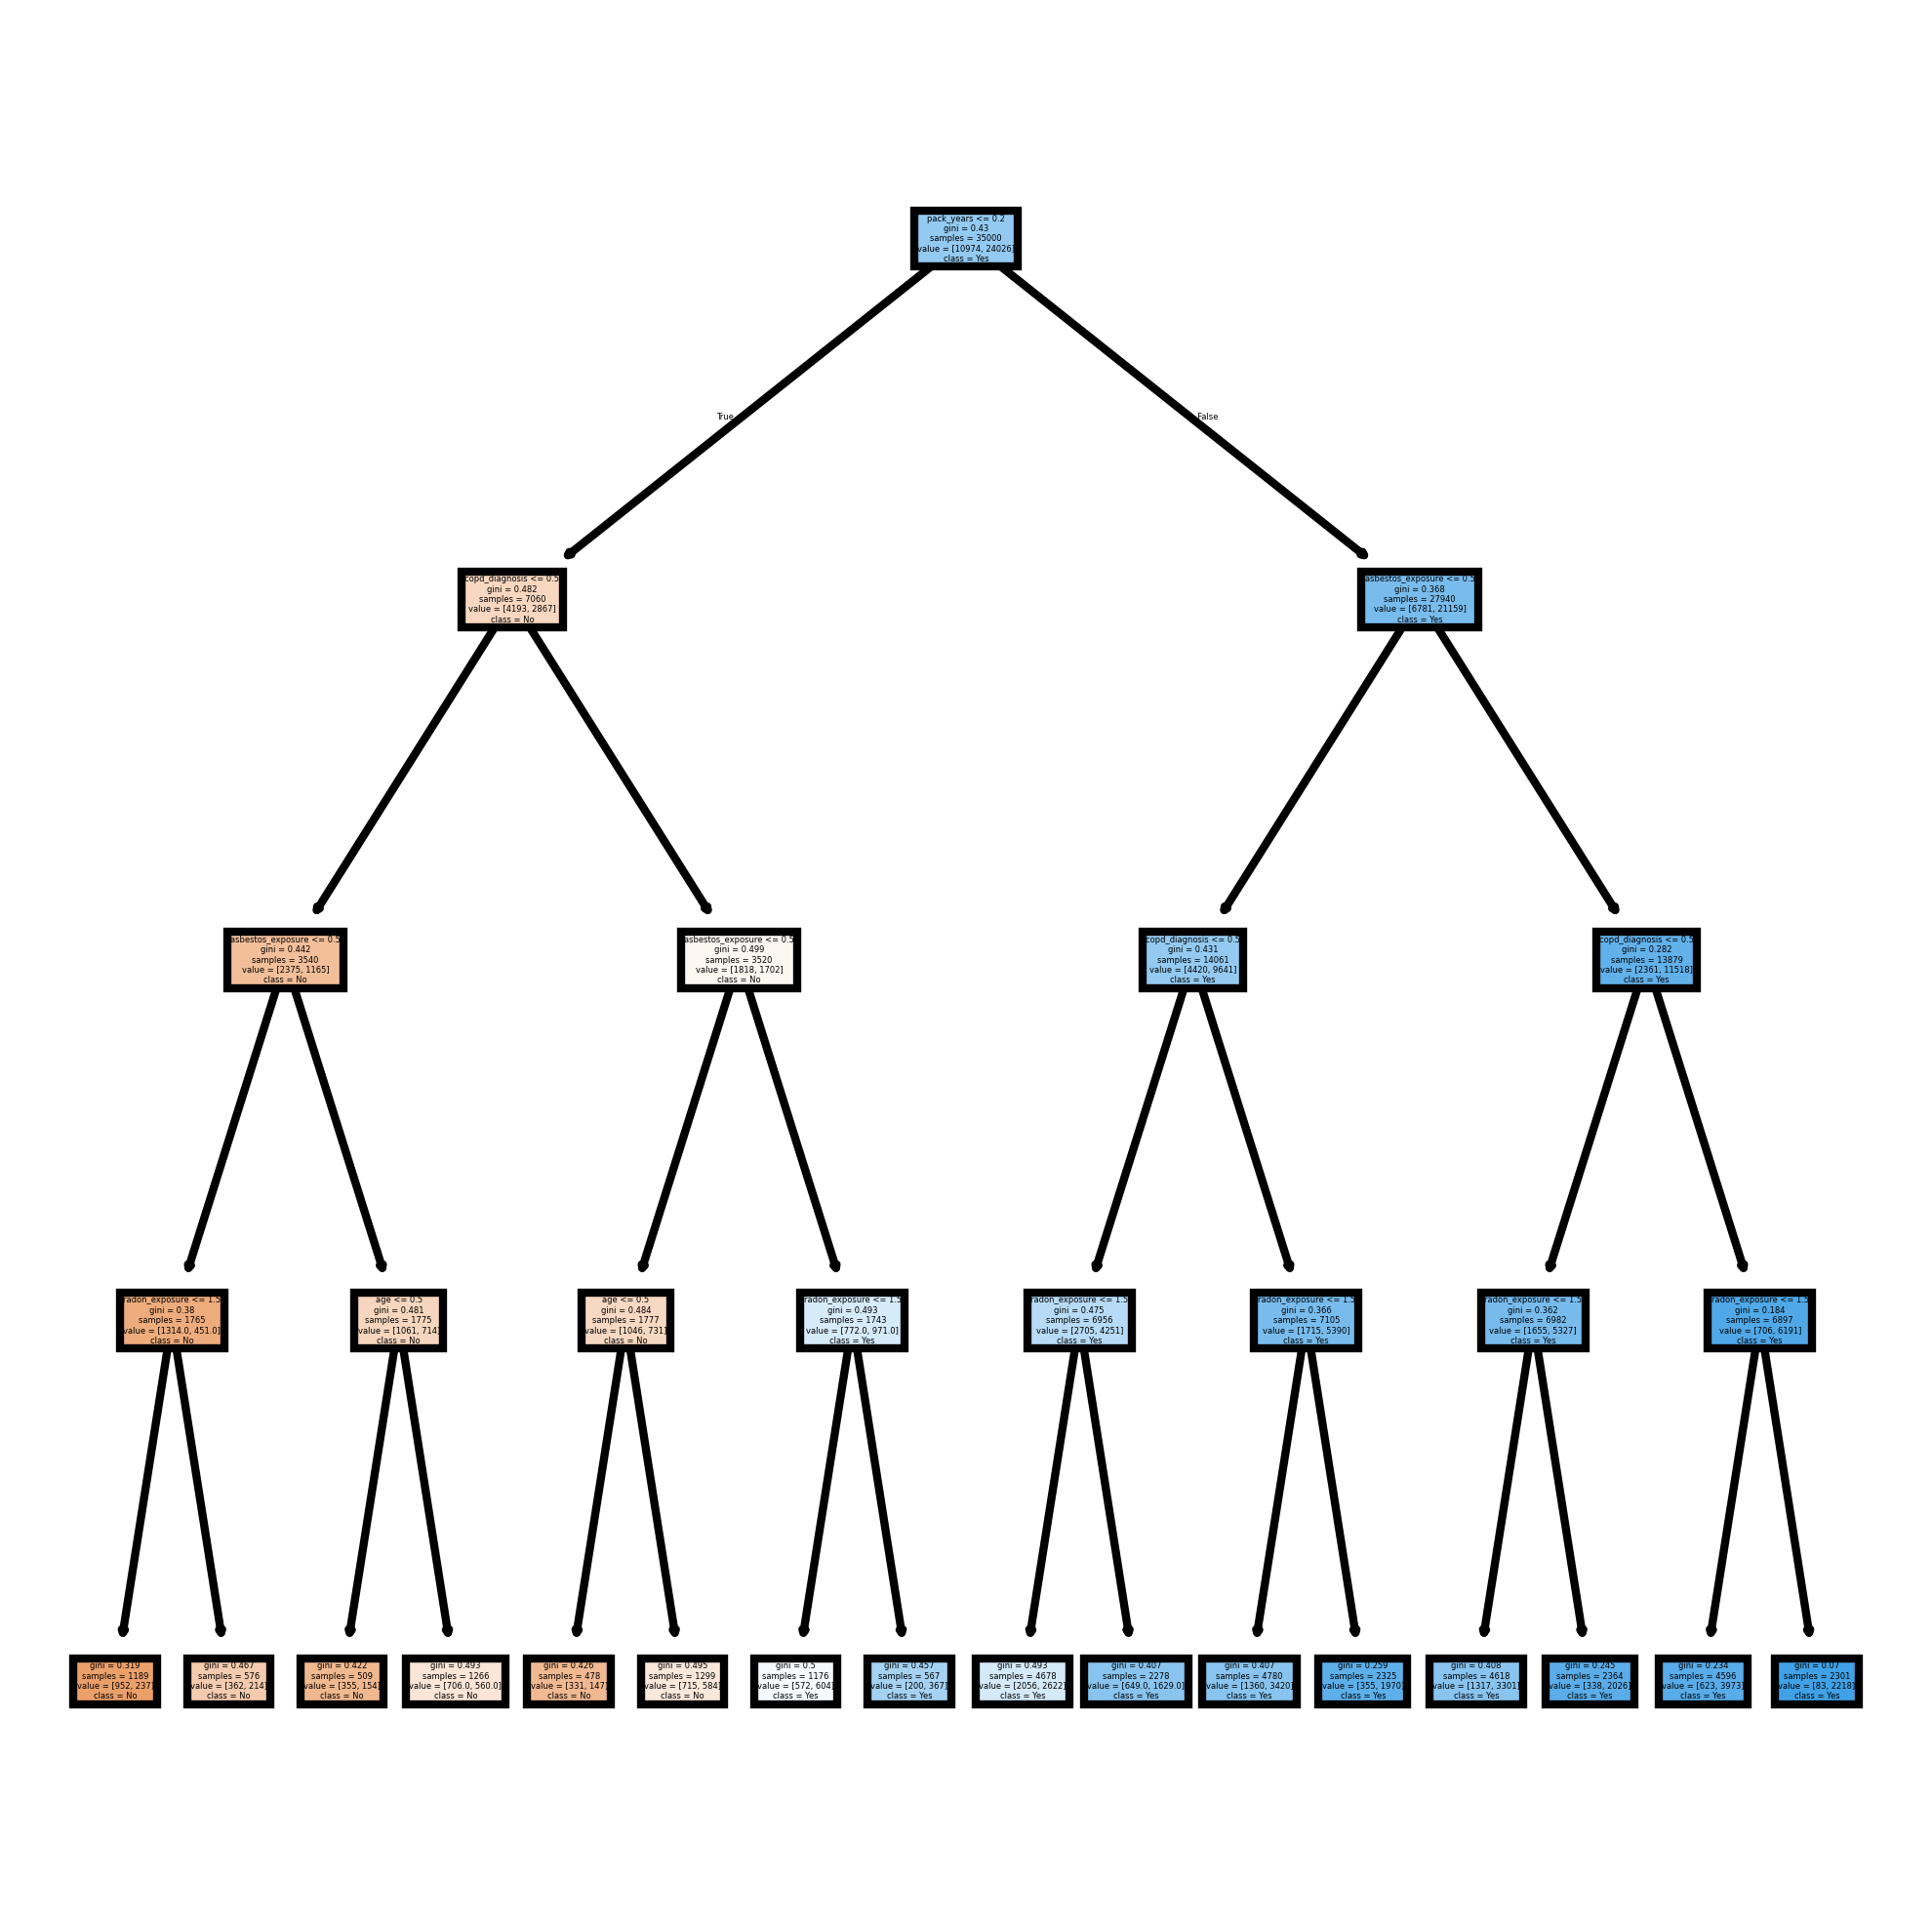

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
import matplotlib.pyplot as plt
import pandas as pd # Ensure pandas is imported

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# إنشاء نموذج شجرة القرار مع معيار Gini
clf_gini_70 = DecisionTreeClassifier(max_depth=4, criterion='gini', random_state=42)
clf_gini_70.fit(X_train, y_train)

y_pred_70_gini = clf_gini_70.predict(X_test)

fn = X.columns
cn = y.unique()

# إعداد الرسم
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(4, 4), dpi=600)
tree.plot_tree(clf_gini_70, feature_names=fn, class_names=cn, filled=True)


# عرض الشجرة
plt.show()

### **plot** the **Decision** **Tree** structure for the 70/30 model using the **Entropy** criterion.

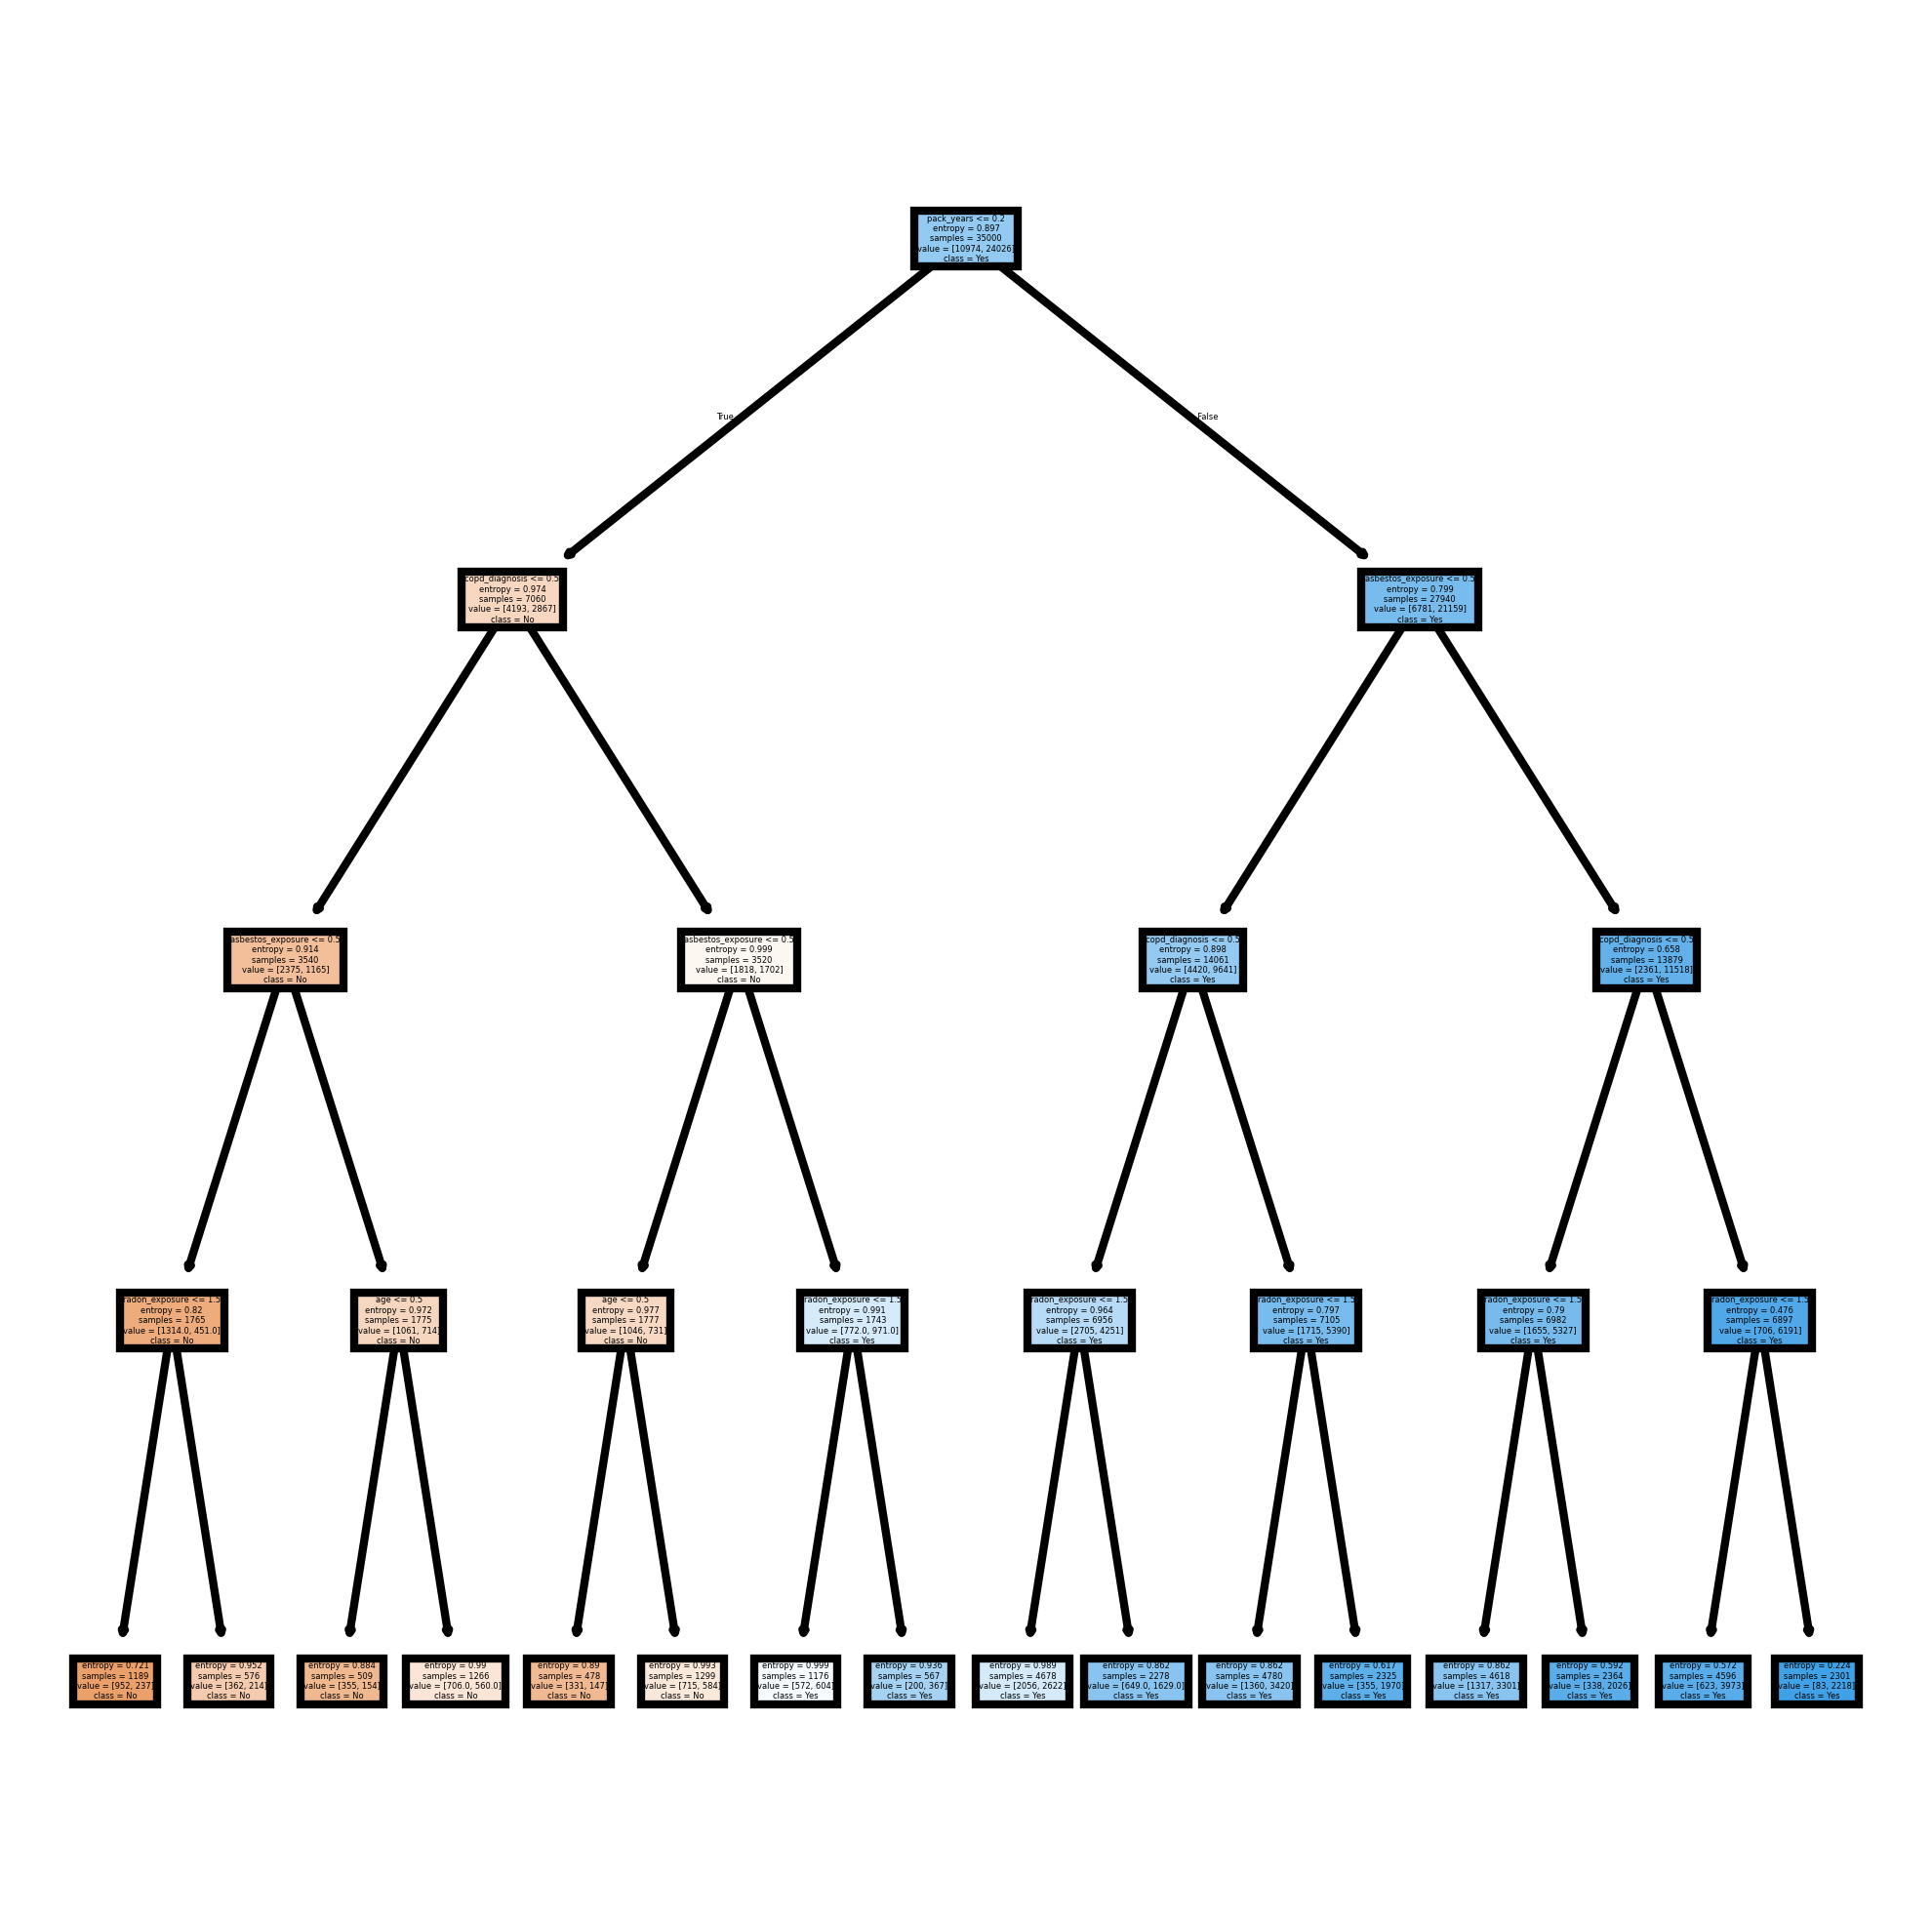

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split

data = pd.read_csv("lung_cancer_preprocessed.csv")

X = data.drop('lung_cancer', axis=1)
y = data['lung_cancer']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

clf_entropy_70 = DecisionTreeClassifier(max_depth=4, criterion='entropy', random_state=42)
clf_entropy_70.fit(X_train, y_train)

y_pred_70_entropy = clf_entropy_70.predict(X_test)

fn = X.columns
cn = y.unique()

fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(4, 4), dpi=600)
tree.plot_tree(clf_entropy_70, feature_names=fn, class_names=cn, filled=True)

plt.show()

# Phase 3 Part 2: Clustering 🧑‍💻

## Step 1 — Load the Preprocessed Dataset

We begin Phase 3 by loading the preprocessed dataset generated in Phase 2.  
This dataset is already cleaned and encoded, so it is ready for applying K-means clustering.


In [6]:
import pandas as pd

df = pd.read_csv("lung_cancer_preprocessed.csv")
print(df.shape)
df.head()



(50000, 11)


,patient_id,age,gender,pack_years,radon_exposure,asbestos_exposure,secondhand_smoke_exposure,copd_diagnosis,alcohol_consumption,family_history,lung_cancer
0,100000,2,1,0.660248,2,0,0,1,1,0,No
1,100001,0,0,0.127785,2,0,1,1,1,1,Yes
2,100002,2,0,0.004055,1,1,1,1,0,0,Yes
3,100003,2,0,0.440640,0,0,1,0,1,0,Yes
4,100004,0,0,0.444313,1,1,0,1,0,1,Yes


## Step 2 – Prepare the feature matrix (X)

We drop columns that should **not** be used as features for clustering:
- `patient_id` (identifier only)
- `lung_cancer` (target label)

The remaining columns will be used as input features for K-Means.




In [7]:
import pandas as pd

# 1) Prepare feature matrix for K-Means
# Drop ID and class label, we don't want them in clustering
cols_to_drop = ['patient_id', 'lung_cancer']  # adjust if your column names differ
feature_cols = [c for c in df.columns if c not in cols_to_drop]

X = df[feature_cols]

print("Feature columns used for clustering:")
print(feature_cols)

print("\nShape of X:", X.shape)
print("\nData types:")
print(X.dtypes)

print("\nFirst 5 rows of features:")
X.head()


Feature columns used for clustering:
['age', 'gender', 'pack_years', 'radon_exposure', 'asbestos_exposure', 'secondhand_smoke_exposure', 'copd_diagnosis', 'alcohol_consumption', 'family_history']

Shape of X: (50000, 9)

Data types:
age                            int64
gender                         int64
pack_years                   float64
radon_exposure                 int64
asbestos_exposure              int64
secondhand_smoke_exposure      int64
copd_diagnosis                 int64
alcohol_consumption            int64
family_history                 int64
dtype: object

First 5 rows of features:


,age,gender,pack_years,radon_exposure,asbestos_exposure,secondhand_smoke_exposure,copd_diagnosis,alcohol_consumption,family_history
0,2,1,0.660248,2,0,0,1,1,0
1,0,0,0.127785,2,0,1,1,1,1
2,2,0,0.004055,1,1,1,1,0,0
3,2,0,0.440640,0,0,1,0,1,0
4,0,0,0.444313,1,1,0,1,0,1


## 📌Step 3 – Standardize the features (StandardScaler)
## 🔹 Standardizing the Features (Why?)

K-Means and PCA are sensitive to scale and variance.  
We use **StandardScaler** so that all features contribute more equally to:
- distance calculations in K-Means  
- variance captured by PCA  

The result `X_scaled` will be used in all clustering and evaluation steps.



In [8]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

print("Shape of X_scaled:", X_scaled.shape)


Shape of X_scaled: (50000, 9)


## 📌Step 4 – K-Means for multiple K values (Elbow & Silhouette)

In this step we run K-Means for different values of K (from 2 to 10), using `X_scaled`.  
For each K we compute:
- **Inertia (WCSS)** → used in the Elbow method  
- **Silhouette score** → measures how well-separated the clusters are  

These plots will help us decide which K values are reasonable to analyze.


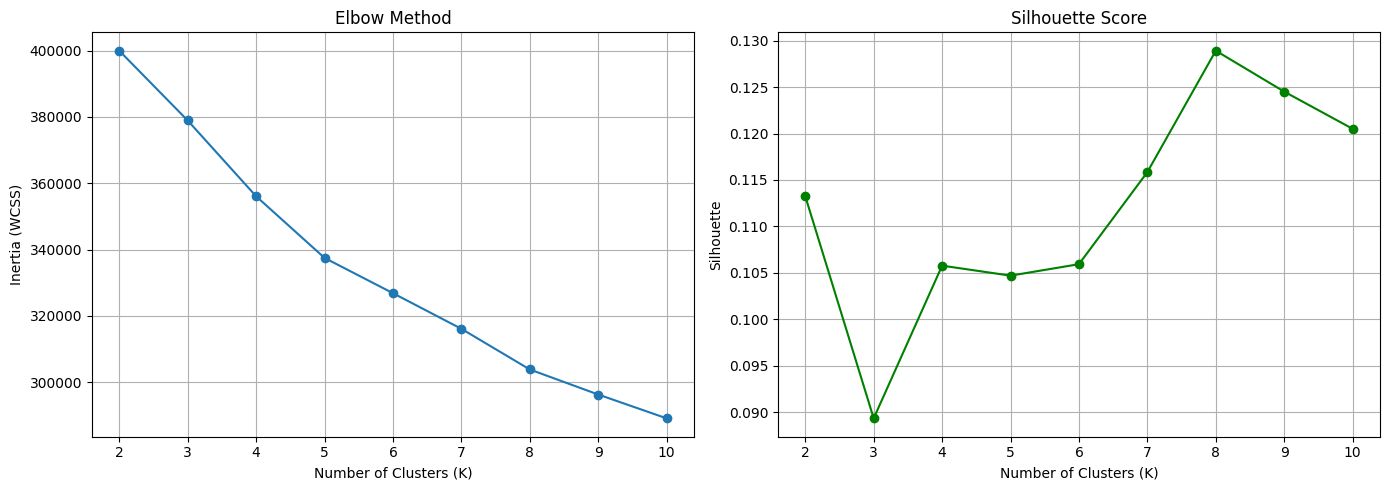

K=2: Inertia=399992.89, Silhouette=0.1133
K=3: Inertia=378938.10, Silhouette=0.0893
K=4: Inertia=356071.91, Silhouette=0.1058
K=5: Inertia=337474.37, Silhouette=0.1047
K=6: Inertia=326830.03, Silhouette=0.1059
K=7: Inertia=316076.99, Silhouette=0.1159
K=8: Inertia=303809.65, Silhouette=0.1289
K=9: Inertia=296250.14, Silhouette=0.1245
K=10: Inertia=289062.15, Silhouette=0.1205


In [15]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

inertia = []
sil_scores = []

K_range = range(2, 11)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans.fit_predict(X_scaled)

    # Use full data for inertia (cheap)
    inertia.append(kmeans.inertia_)

    # Use only a sample of points for silhouette (expensive)
    score = silhouette_score(
        X_scaled, labels,
        metric='euclidean',
        sample_size=3000,
        random_state=42
    )
    sil_scores.append(score)

plt.figure(figsize=(14, 5))

# Elbow plot
plt.subplot(1, 2, 1)
plt.plot(K_range, inertia, marker='o')
plt.title("Elbow Method")
plt.xlabel("Number of Clusters (K)")
plt.ylabel("Inertia (WCSS)")
plt.grid(True)

# Silhouette plot
plt.subplot(1, 2, 2)
plt.plot(K_range, sil_scores, marker='o', color='green')
plt.title("Silhouette Score")
plt.xlabel("Number of Clusters (K)")
plt.ylabel("Silhouette")
plt.grid(True)

plt.tight_layout()
plt.show()

for k, w, s in zip(K_range, inertia, sil_scores):
    print(f"K={k}: Inertia={w:.2f}, Silhouette={s:.4f}")


Running K-Means for different K values... This might take a minute.
K=2: Inertia=399992.89, Silhouette=0.1129
K=3: Inertia=378938.10, Silhouette=0.0900
K=4: Inertia=356071.91, Silhouette=0.1068
K=5: Inertia=337474.37, Silhouette=0.1047
K=6: Inertia=326830.03, Silhouette=0.1064
K=7: Inertia=316076.99, Silhouette=0.1163
K=8: Inertia=303809.65, Silhouette=0.1293
K=9: Inertia=296250.14, Silhouette=0.1239
K=10: Inertia=289062.15, Silhouette=0.1192


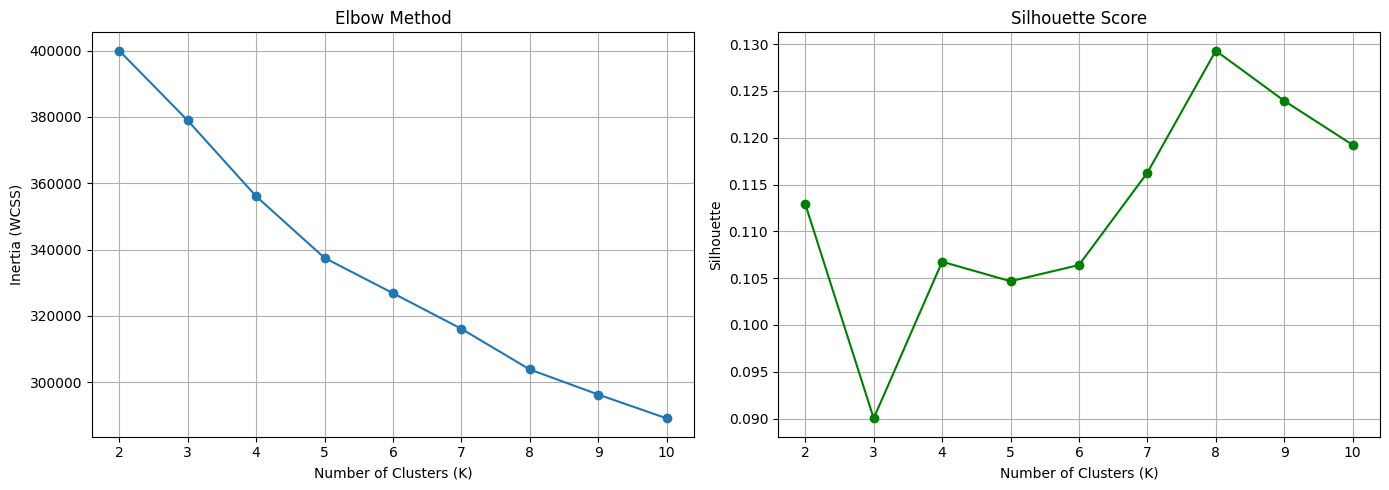

In [16]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

inertia = []
sil_scores = []
K_range = range(2, 11)  # من 2 إلى 10

print("Running K-Means for different K values... This might take a minute.")

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)

    # نشتغل على البيانات بعد الـ scaling
    labels = kmeans.fit_predict(X_scaled)

    inertia.append(kmeans.inertia_)

    # نستخدم عينة 5000 صف للتسريع
    score = silhouette_score(X_scaled, labels, sample_size=5000, random_state=42)
    sil_scores.append(score)

    print(f"K={k}: Inertia={kmeans.inertia_:.2f}, Silhouette={score:.4f}")

plt.figure(figsize=(14, 5))

# Elbow
plt.subplot(1, 2, 1)
plt.plot(K_range, inertia, marker='o')
plt.title("Elbow Method")
plt.xlabel("Number of Clusters (K)")
plt.ylabel("Inertia (WCSS)")
plt.grid(True)

# Silhouette
plt.subplot(1, 2, 2)
plt.plot(K_range, sil_scores, marker='o', color='green')
plt.title("Silhouette Score")
plt.xlabel("Number of Clusters (K)")
plt.ylabel("Silhouette")
plt.grid(True)

plt.tight_layout()
plt.show()


## 🔍 Summary of K-Means Results (Elbow + Silhouette)

### **Elbow Method**
The inertia decreases steadily without a sharp elbow.  
Reasonable candidates: **K = 4** and **K = 6**.

### **Silhouette Score**
The highest silhouette value appears at **K = 8**, indicating the best cluster separation.

### **Final Conclusion**
- **K = 8** is the strongest choice (best clustering quality).  
- **K = 4** and **K = 6** are also acceptable for comparison based on the Elbow trend.


## 📌Step 5 — Fit K-Means Using the Selected K Values (K = 4, 6, 8)

We selected **K = 4**, **K = 6**, and **K = 8** based on the Elbow and Silhouette results.  
These values represent reasonable structures in the dataset and allow us to compare simple vs more detailed segmentation.


In [17]:
selected_K = [4, 6, 8]
models = {}

for k in selected_K:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans.fit_predict(X_scaled)
    models[k] = labels
    print(f"K={k} fitted successfully.")


K=4 fitted successfully.
K=6 fitted successfully.
K=8 fitted successfully.


## 📌Step 6 — PCA Dimensionality Reduction (2 Components)

Since the dataset has multiple features, PCA is used to reduce it to **2 components** for visualization.  
This does NOT affect clustering — it only helps us plot the clusters clearly.


In [18]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

print("PCA reduction completed. Shape:", X_pca.shape)


PCA reduction completed. Shape: (50000, 2)


## 📌Step 7 — Visualize Clusters in 2D (PCA Space)

We plot the clusters for each selected K (4, 6, and 8) using the PCA-transformed data.  
This helps us visually compare how cluster separation changes as K increases.


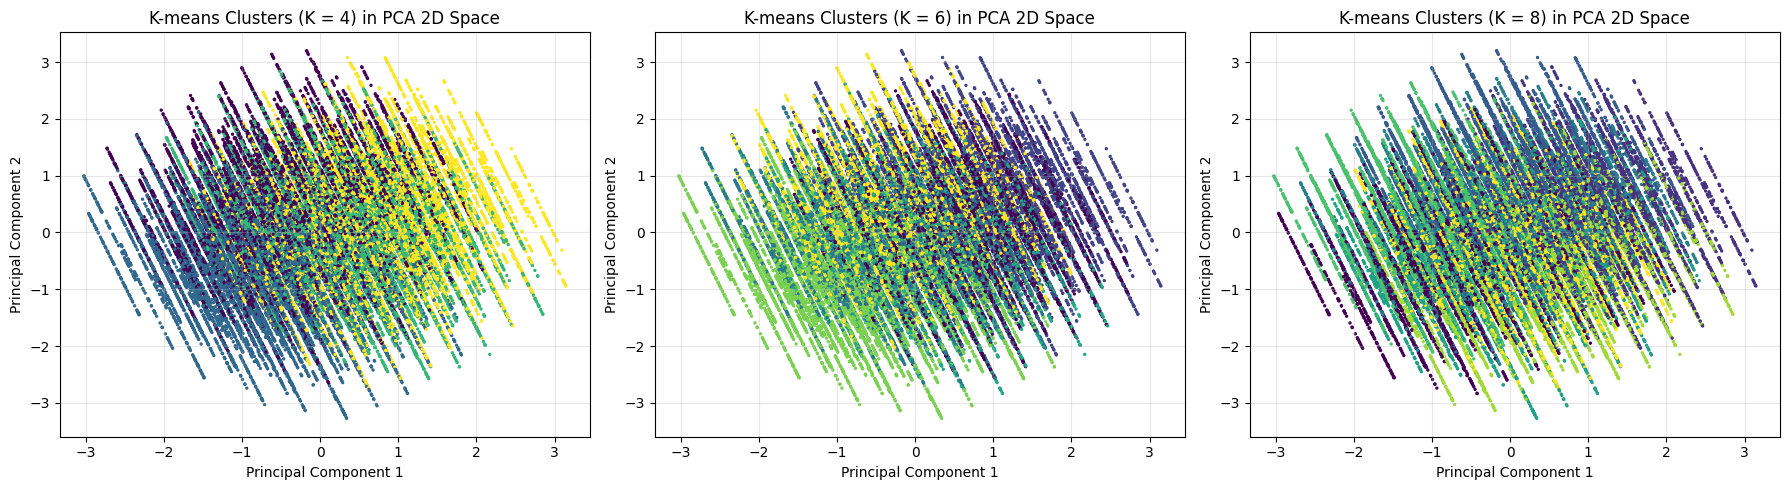

In [19]:
import matplotlib.pyplot as plt

plt.figure(figsize=(18, 5))

for i, k in enumerate(selected_K, 1):
    plt.subplot(1, 3, i)
    plt.scatter(X_pca[:, 0], X_pca[:, 1], c=models[k], cmap='viridis', s=2)
    plt.title(f"K-means Clusters (K = {k}) in PCA 2D Space")
    plt.xlabel("Principal Component 1")
    plt.ylabel("Principal Component 2")
    plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()
